In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import classification_report,confusion_matrix

In [28]:
train_df = pd.read_csv(r"mitbih_train.csv", header=None)
test_df = pd.read_csv(r"mitbih_test.csv", header=None)

In [29]:
df =pd.concat([train_df, test_df], ignore_index=True)

In [30]:
df.shape

(109446, 188)

In [31]:
df = df.drop_duplicates()

In [32]:
df.shape

(109446, 188)

In [33]:
df[187] = df[187].apply(lambda x: 0 if x == 0 else 1)


In [34]:
df[187].value_counts()

187
0    90589
1    18857
Name: count, dtype: int64

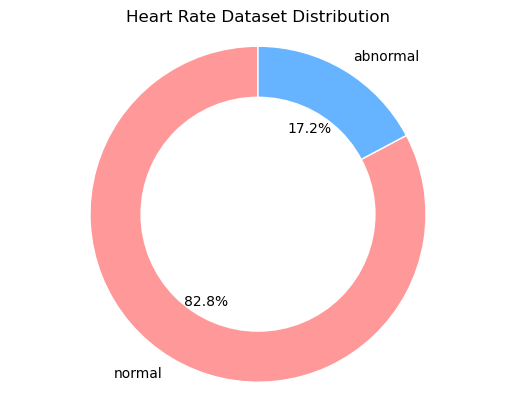

In [35]:
import matplotlib.pyplot as plt

# Data
labels = ['normal','abnormal']
sizes = [90589,18857]

# Colors for the segments
colors = ['#ff9999','#66b3ff']

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Draw a white circle at the center to create the donut shape
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Title
plt.title('Heart Rate Dataset Distribution')

# Show the plot
plt.show()


In [36]:
X = df.drop(columns=187)
y = df[187]

In [37]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


##  evaluation

In [39]:
model = Sequential()
model.add(Dense(128, input_dim=187, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])


In [40]:
history = model.fit(X_train,y_train, epochs=400, batch_size=512, validation_data=(X_test, y_test))


Epoch 1/400
150/150 [==============================] - 2s 6ms/step - loss: 0.2723 - accuracy: 0.9065 - precision: 0.9071 - recall: 0.5118 - val_loss: 0.1778 - val_accuracy: 0.9425 - val_precision: 0.9005 - val_recall: 0.7450
Epoch 2/400
150/150 [==============================] - 1s 4ms/step - loss: 0.1534 - accuracy: 0.9507 - precision: 0.9349 - recall: 0.7686 - val_loss: 0.1395 - val_accuracy: 0.9564 - val_precision: 0.9041 - val_recall: 0.8329
Epoch 3/400
150/150 [==============================] - 1s 4ms/step - loss: 0.1255 - accuracy: 0.9603 - precision: 0.9421 - recall: 0.8207 - val_loss: 0.1216 - val_accuracy: 0.9617 - val_precision: 0.9179 - val_recall: 0.8520
Epoch 4/400
150/150 [==============================] - 0s 3ms/step - loss: 0.1122 - accuracy: 0.9641 - precision: 0.9454 - recall: 0.8414 - val_loss: 0.1079 - val_accuracy: 0.9656 - val_precision: 0.9350 - val_recall: 0.8579
Epoch 5/400
150/150 [==============================] - 0s 3ms/step - loss: 0.1020 - accuracy: 0.9676

In [41]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------------')
print(classification_report(y_test, y_pred))


1027/1027 [==============================] - 1s 778us/step
[[26956   277]
 [  355  5246]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27233
           1       0.95      0.94      0.94      5601

    accuracy                           0.98     32834
   macro avg       0.97      0.96      0.97     32834
weighted avg       0.98      0.98      0.98     32834



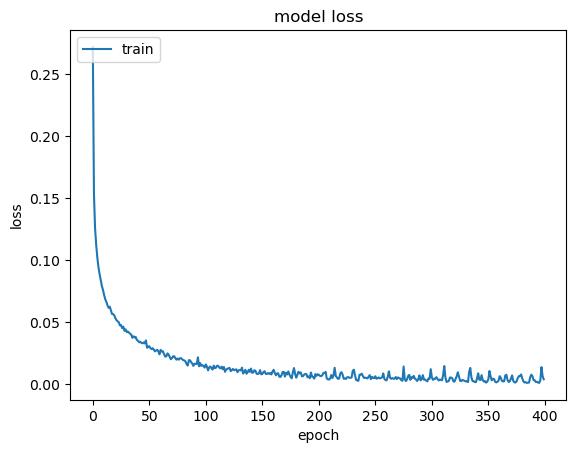

In [42]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

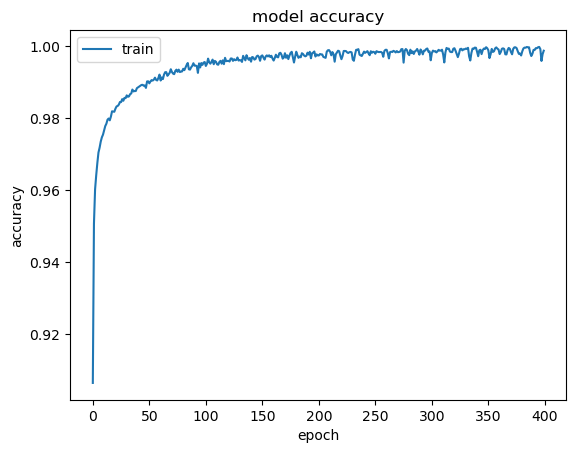

In [43]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## After data augmentation

In [44]:
from sklearn.utils import resample
df_1=df[df[187]==1].sample(n=30000,random_state=42,replace=True)
df_0=(df[df[187]==0]).sample(n=60000,random_state=42)



df1=pd.concat([df_0,df_1])

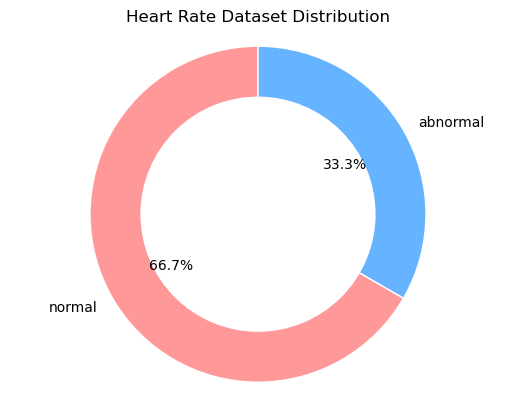

In [45]:
import matplotlib.pyplot as plt

# Data
labels = ['normal','abnormal']
sizes = [60000,30000]

# Colors for the segments
colors = ['#ff9999','#66b3ff']

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Draw a white circle at the center to create the donut shape
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Title
plt.title('Heart Rate Dataset Distribution')

# Show the plot
plt.show()


In [46]:
X1 = df1.drop(columns=187)
y1 = df1[187]
X_train1, X_test, y_train1, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [47]:
modell = Sequential()
modell.add(Dense(128, input_dim=187, activation='relu'))
modell.add(Dense(64, activation='relu'))
modell.add(Dense(16, activation='relu'))
modell.add(Dense(1, activation='sigmoid'))

modell.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])


In [48]:
history = modell.fit(X_train1,y_train1, epochs=200, batch_size=700, validation_data=(X_test, y_test))


Epoch 1/200
90/90 [==============================] - 2s 8ms/step - loss: 0.5024 - accuracy: 0.8030 - precision: 0.7423 - recall: 0.6277 - val_loss: 0.3345 - val_accuracy: 0.8696 - val_precision: 0.8872 - val_recall: 0.6962
Epoch 2/200
90/90 [==============================] - 0s 5ms/step - loss: 0.2864 - accuracy: 0.8881 - precision: 0.9101 - recall: 0.7378 - val_loss: 0.2446 - val_accuracy: 0.9049 - val_precision: 0.9137 - val_recall: 0.7882
Epoch 3/200
90/90 [==============================] - 1s 6ms/step - loss: 0.2258 - accuracy: 0.9145 - precision: 0.9251 - recall: 0.8093 - val_loss: 0.2029 - val_accuracy: 0.9264 - val_precision: 0.9397 - val_recall: 0.8321
Epoch 4/200
90/90 [==============================] - 0s 4ms/step - loss: 0.1909 - accuracy: 0.9306 - precision: 0.9394 - recall: 0.8467 - val_loss: 0.1757 - val_accuracy: 0.9371 - val_precision: 0.9480 - val_recall: 0.8577
Epoch 5/200
90/90 [==============================] - 1s 6ms/step - loss: 0.1682 - accuracy: 0.9408 - precisi

In [49]:
y_pred = modell.predict(X_test)
y_pred = (y_pred > 0.5)

print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------------')
print(classification_report(y_test, y_pred))


844/844 [==============================] - 1s 853us/step
[[17740   286]
 [  163  8811]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18026
           1       0.97      0.98      0.98      8974

    accuracy                           0.98     27000
   macro avg       0.98      0.98      0.98     27000
weighted avg       0.98      0.98      0.98     27000



### Compare Random Forest, a traditional machine learning approach, with deep learning methods to evaluate their performance differences.

In [50]:


Ran =  RandomForestClassifier(random_state=42)
Ran.fit(X_train,y_train)
y_pred1 = Ran.predict(X_test)
print(classification_report(y_test,y_pred1))
print('---------------------------------------------------------')
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18026
           1       1.00      0.96      0.98      8974

    accuracy                           0.99     27000
   macro avg       0.99      0.98      0.99     27000
weighted avg       0.99      0.99      0.99     27000

---------------------------------------------------------
[[18007    19]
 [  316  8658]]
